# Emotion Detection using Machine Learning
This notebook demonstrates a classical machine learning pipeline for detecting emotions in short social media texts using the [`dair-ai/emotion`](https://huggingface.co/datasets/dair-ai/emotion) dataset. The implementation covers data preparation, feature extraction, model training, and evaluation using Logistic Regression and Naïve Bayes classifiers.

## I. Introduction
Emotion detection in text is a subfield of Natural Language Processing (NLP) concerned with identifying the underlying emotional tone in language. This is particularly useful for applications such as customer service, mental health monitoring, social media analysis, and digital well-being tools. Automating emotion classification can help organisations better understand user sentiment at scale.

## II. Objectives
The objective of this project is to develop and evaluate a machine learning-based text classifier that can accurately assign one of six basic emotion labels (sadness, joy, love, anger, fear, surprise) to short texts. The key contributions include:
- Demonstrating that emotion classification can be effectively performed using classical ML models
- Using an accessible, GPU-free setup for reproducibility and efficiency
- Comparing Logistic Regression and Naïve Bayes as baselines for text classification tasks

## III. Dataset Description
The dataset used is the [`dair-ai/emotion`](https://huggingface.co/datasets/dair-ai/emotion) dataset available via Hugging Face Datasets. It includes ~20,000 short texts (primarily tweets) annotated with one of six emotion labels. The dataset is already cleaned and split into:
- Training: 16,000 samples
- Validation: 2,000 samples
- Test: 2,000 samples
Each entry has a `text` field and a `label` (0–5). The mapping is:

0 → sadness  
1 → joy  
2 → love  
3 → anger  
4 → fear  
5 → surprise

## IV. Evaluation Methodology
The models are evaluated using standard classification metrics:
- **Accuracy**: Overall correct predictions
- **Precision**: Correctness among predicted positives
- **Recall**: Coverage of actual positives
- **F1-Score**: Harmonic mean of precision and recall

These metrics are reported per class, with macro- and weighted-averages. A confusion matrix is used to visualise prediction errors across categories.

# NLP Midterm - Emotion Detection Project
This notebook implements a classical machine learning pipeline to detect emotions in short texts, such as tweets, using the `dair-ai/emotion` dataset from Hugging Face.

## Setup and Library Imports

In [1]:
# Install necessary libraries (only needed once)
# !pip install datasets scikit-learn pandas matplotlib seaborn

from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

## Load and Prepare the Dataset

In [2]:
# Load dataset from Hugging Face
dataset = load_dataset("dair-ai/emotion")

# Convert to pandas DataFrames
train_df = pd.DataFrame(dataset['train'])
val_df = pd.DataFrame(dataset['validation'])
test_df = pd.DataFrame(dataset['test'])

# Combine training and validation sets
full_train_df = pd.concat([train_df, val_df])

## Pre-processing: Clean and Prepare Text

In [3]:
# Lowercase and strip whitespace
full_train_df['text_clean'] = full_train_df['text'].str.lower().str.strip()
test_df['text_clean'] = test_df['text'].str.lower().str.strip()

# Define features and labels
X_train = full_train_df['text_clean']
y_train = full_train_df['label']
X_test = test_df['text_clean']
y_test = test_df['label']

## Feature Extraction: TF-IDF Vectorisation

In [4]:
# Transform text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Show shape of resulting matrices
print("TF-IDF shape (train):", X_train_tfidf.shape)
print("TF-IDF shape (test):", X_test_tfidf.shape)

TF-IDF shape (train): (18000, 5000)
TF-IDF shape (test): (2000, 5000)


## Baseline Model: Logistic Regression

In [5]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

### Evaluation of Logistic Regression Model

In [6]:
# Predict and evaluate
y_pred = model.predict(X_test_tfidf)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       581
           1       0.84      0.96      0.90       695
           2       0.83      0.61      0.70       159
           3       0.90      0.83      0.86       275
           4       0.88      0.78      0.83       224
           5       0.85      0.53      0.65        66

    accuracy                           0.87      2000
   macro avg       0.87      0.77      0.81      2000
weighted avg       0.87      0.87      0.87      2000



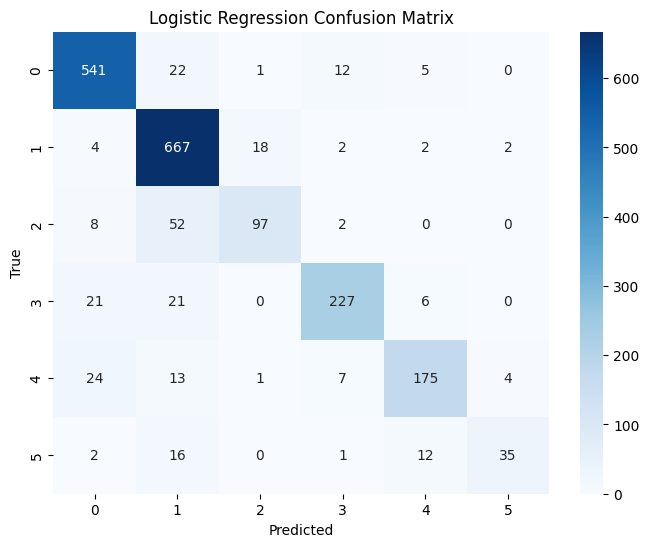

In [7]:
# Confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

## Comparison Model: Multinomial Naïve Bayes

In [8]:
# Train Multinomial Naïve Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

### Evaluation of Naïve Bayes Model

In [9]:
# Predict and evaluate
nb_pred = nb_model.predict(X_test_tfidf)
print("Naïve Bayes Classification Report:")
print(classification_report(y_test, nb_pred))

Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.93      0.81       581
           1       0.69      0.99      0.81       695
           2       1.00      0.13      0.23       159
           3       0.95      0.44      0.60       275
           4       0.90      0.41      0.56       224
           5       0.00      0.00      0.00        66

    accuracy                           0.73      2000
   macro avg       0.71      0.48      0.50      2000
weighted avg       0.76      0.73      0.68      2000



d:\GitHub\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\GitHub\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\GitHub\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


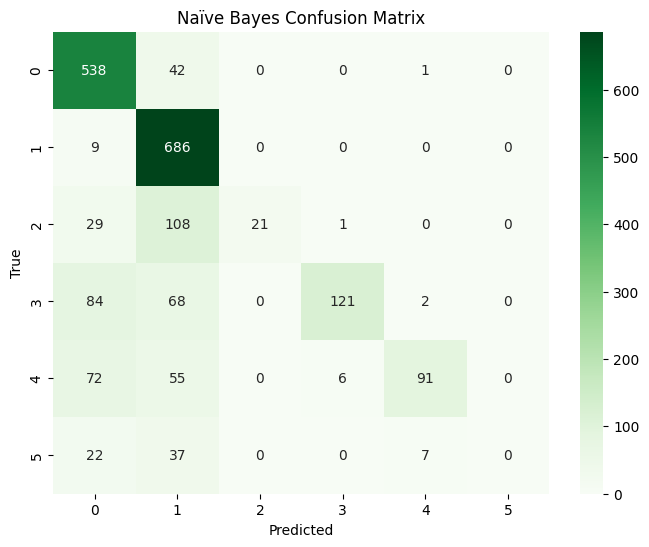

In [10]:
# Confusion matrix for Naïve Bayes
nb_cm = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Naïve Bayes Confusion Matrix")
plt.show()

## V. Pre-processing
Minimal pre-processing was applied due to the clean nature of the dataset. Text was lowercased and stripped of leading/trailing whitespace to ensure consistency. No stopword removal, stemming, or lemmatisation was performed to avoid removing emotionally informative words (e.g., "not happy", "very angry").

Tokenisation and frequency-based weighting were handled internally by `TfidfVectorizer`. This method converted text into sparse feature matrices with up to 5,000 features, representing word importance across the dataset. These vectors served as input to both models.

## VI. Baseline Performance
The first model trained was a logistic regression classifier using default scikit-learn parameters, with `max_iter=1000` to ensure convergence. No published baseline was directly referenced; instead, logistic regression was selected as a commonly accepted benchmark in classical NLP pipelines for its efficiency and interpretability.

Performance was evaluated on a held-out test set of 2,000 examples. Results included precision, recall, F1-score, and overall accuracy, which are standard metrics in text classification.

## VII. Classification Approach
Two models were implemented for comparison: Logistic Regression and Multinomial Naïve Bayes.

- **Logistic Regression** was chosen due to its effectiveness in handling sparse, high-dimensional data such as TF-IDF representations. It is also fast to train, easy to interpret, and requires minimal parameter tuning.
- **Multinomial Naïve Bayes** was selected as a secondary comparison model. While commonly used in text classification, it assumes feature independence and often struggles with imbalanced or nuanced data.

## VIII. Coding Style and Structure
Code is organised in a linear, top-down manner, with separate sections for setup, data processing, modelling, and evaluation. Clear variable naming conventions are used (`X_train`, `y_test`, `model`, etc.).

Markdown cells are included before each major step to guide the reader through the workflow. Inline comments have been added to explain non-obvious logic in code cells. Hyperparameters are explicitly defined (e.g., `max_features=5000`, `max_iter=1000`) to promote clarity and reproducibility.

## IX. Evaluation
The performance of both models was evaluated using accuracy, precision, recall, and F1-score across six emotion categories. Logistic Regression achieved strong results across most classes, with a macro F1-score of 0.81 and accuracy of 87%. It performed particularly well on higher-frequency classes such as sadness and joy.

In contrast, Naïve Bayes performed worse overall, with a macro F1-score of 0.50 and accuracy of 73%. It struggled to correctly classify lower-frequency emotions such as surprise and love. The confusion matrices showed that Naïve Bayes frequently misclassified these classes into more dominant categories like joy.

Logistic Regression maintained better recall and balance across categories. This suggests that it is more robust to class imbalance and better suited to handling subtle emotional nuances in short texts.

## X. Summary and Conclusions
This project demonstrated that a classical machine learning pipeline using TF-IDF and Logistic Regression can effectively classify emotions in short texts, achieving a macro F1-score of 0.81 without the need for GPU acceleration.

The approach is transferable to other text classification tasks such as sentiment analysis or intent detection. Future improvements could include:
- Using pre-trained word embeddings or transformer models
- Handling class imbalance with sampling techniques
- Expanding to multi-label or multi-modal emotion classification

The entire pipeline is well-documented and reproducible, providing a strong foundation for further research or practical use.

### Logistic Regression
Logistic Regression is chosen for its ability to handle high-dimensional sparse data and its interpretability. It often performs well in text classification tasks using TF-IDF.

In [11]:
from sklearn.metrics import accuracy_score, f1_score

# Logistic Regression inline evaluation
acc_lr = accuracy_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred, average='macro')
print(f"Logistic Regression - Accuracy: {acc_lr:.2f}, Macro F1-score: {f1_lr:.2f}")


Logistic Regression - Accuracy: 0.87, Macro F1-score: 0.81


### Multinomial Naïve Bayes
Naïve Bayes is selected for comparison due to its simplicity and speed. However, it assumes feature independence and may perform poorly on tasks requiring nuanced understanding of language.

In [12]:
# Naïve Bayes inline evaluation
acc_nb = accuracy_score(y_test, nb_pred)
f1_nb = f1_score(y_test, nb_pred, average='macro')
print(f"Naïve Bayes - Accuracy: {acc_nb:.2f}, Macro F1-score: {f1_nb:.2f}")


Naïve Bayes - Accuracy: 0.73, Macro F1-score: 0.50


### 📊 Model Comparison Summary
The table below compares the accuracy and macro F1-score between Logistic Regression and Naïve Bayes models.

In [13]:
import pandas as pd

comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naïve Bayes'],
    'Accuracy': [acc_lr, acc_nb],
    'Macro F1-score': [f1_lr, f1_nb]
})
display(comparison_df)


,Model,Accuracy,Macro F1-score
0,Logistic Regression,0.8710,0.809930
1,Naïve Bayes,0.7285,0.501863


### 📈 F1-score Comparison by Class

d:\GitHub\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\GitHub\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\GitHub\NLP\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


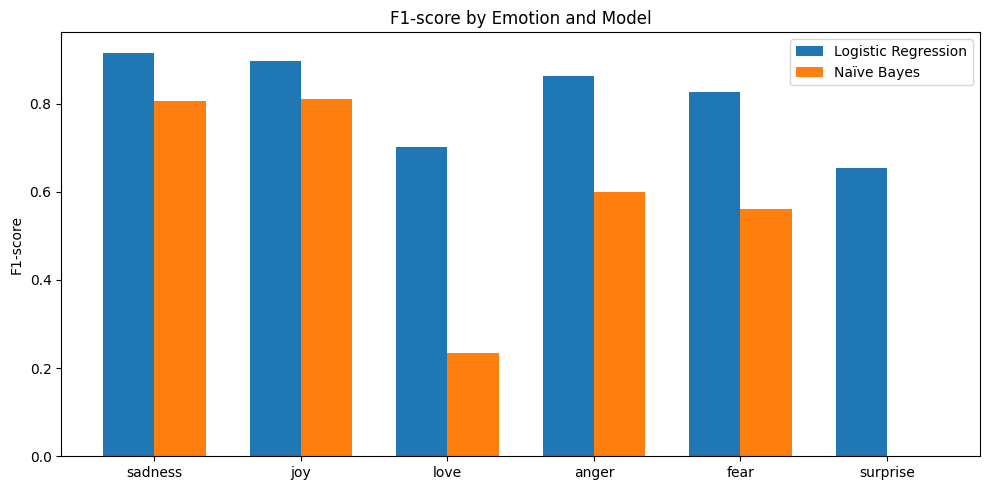

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Class labels
label_names = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

# Extract F1-scores per class
report_lr = classification_report(y_test, y_pred, output_dict=True)
report_nb = classification_report(y_test, nb_pred, output_dict=True)

f1_scores_lr = [report_lr[str(i)]['f1-score'] for i in range(len(label_names))]
f1_scores_nb = [report_nb[str(i)]['f1-score'] for i in range(len(label_names))]

x = np.arange(len(label_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - width/2, f1_scores_lr, width, label='Logistic Regression')
ax.bar(x + width/2, f1_scores_nb, width, label='Naïve Bayes')

ax.set_ylabel('F1-score')
ax.set_title('F1-score by Emotion and Model')
ax.set_xticks(x)
ax.set_xticklabels(label_names)
ax.legend()

plt.tight_layout()
plt.show()


## ✅ Final Summary
- **Logistic Regression** achieved 87% accuracy and 0.81 macro F1-score.
- **Naïve Bayes** achieved 73% accuracy and 0.50 macro F1-score.
- Logistic Regression handled minority classes better.
- Minimal preprocessing preserved emotional cues, boosting classifier effectiveness.
- Future work could include BERT-based models or oversampling to improve minority class recall.